In [1]:
%run crazy.py
from sklearn.preprocessing import LabelEncoder

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
his= downcast(his)
new= downcast(new)
le_yn_y= LabelEncoder().fit(['N','Y'])
le_yn_n= LabelEncoder().fit(['Y','N'])
le_ab= LabelEncoder().fit(['A','B','C'])
his= pd.merge( his, mer.loc[:,['merchant_id','category_4','most_recent_sales_range','numerical_1']], on='merchant_id',how='left')
new= pd.merge( new, mer.loc[:,['merchant_id','category_4','most_recent_sales_range','numerical_1']], on='merchant_id',how='left')
his.authorized_flag= le_yn_y.transform( his.authorized_flag)
new.authorized_flag= le_yn_y.transform( new.authorized_flag)
his.category_4= his.category_4.fillna( method='ffill')
new.category_4= new.category_4.fillna( method='ffill')
his.category_4= le_yn_n.transform( his.category_4)
new.category_4= le_yn_n.transform( new.category_4)
his.category_3= his.category_3.fillna( method='ffill')
new.category_3= new.category_3.fillna( method='ffill')
his.category_3= le_ab.transform( his.category_3)
new.category_3= le_ab.transform( new.category_3)
his['due']= his.installments - his.category_3
new['due']= new.installments - new.category_3
his.purchase_date= his.purchase_date.dt.date
new.purchase_date= new.purchase_date.dt.date

Memory usage decreased from 3109.54 to 2831.90 Mb i.e 8.93%
Memory usage decreased from 209.67 to 187.21 Mb i.e 10.71%


In [3]:
subsector_trans_daily_max= his.groupby(['card_id','subsector_id','purchase_date']).size().reset_index().groupby('subsector_id')[0].nlargest().reset_index().groupby('subsector_id')[0].mean().reset_index()
subsector_trans_daily_max

subsector_id      0
0             -1    7.4
1              1   37.2
2              2   19.6
3              3  221.0
4              4   35.2
5              5   24.2
6              7   56.4
7              8   51.6
8              9   23.6
9             10   15.0
10            11    6.4
11            12   17.0
12            13    6.8
13            14    6.8
14            15   27.0
15            16  104.8
16            17  239.4
17            18   33.4
18            19   24.6
19            20   23.8
20            21   15.6
21            22   81.8
22            23   11.6
23            24    7.6
24            25   53.4
25            26   12.4
26            27   26.0
27            28    3.0
28            29   80.0
29            30   17.6
30            31   43.0
31            32   26.0
32            33   89.6
33            34   50.0
34            35   46.2
35            36   23.0
36            37   43.4
37            38   28.0
38            39    8.6
39            40   25.2
40            41   23.6

In [4]:
his_subsector_trans_merchant_cnt= his.groupby(['card_id','subsector_id','merchant_id']).size().reset_index()
new_subsector_trans_merchant_cnt= new.groupby(['card_id','subsector_id','merchant_id']).size().reset_index()
his_subsector_trans_merchant_cnt.columns= ['card_id','subsector_id','merchant_id','subsector_merchant_cnt']
new_subsector_trans_merchant_cnt.columns= ['card_id','subsector_id','merchant_id','subsector_merchant_cnt']

In [5]:
merchant_time_dist= his.groupby(['card_id','merchant_id']).purchase_date.nunique().reset_index()
merchant_time_dist

card_id      merchant_id  purchase_date
0         C_ID_00007093c1  M_ID_0379adb435              4
1         C_ID_00007093c1  M_ID_06a8d84366              1
2         C_ID_00007093c1  M_ID_0dabc5a70c              2
3         C_ID_00007093c1  M_ID_109e9d2b1d              2
4         C_ID_00007093c1  M_ID_15446e939c              1
5         C_ID_00007093c1  M_ID_1b440d74fb              1
6         C_ID_00007093c1  M_ID_24e067cb2b              1
7         C_ID_00007093c1  M_ID_2efbd71a00              1
8         C_ID_00007093c1  M_ID_3c6556f2dd              1
9         C_ID_00007093c1  M_ID_490fc654fb              1
10        C_ID_00007093c1  M_ID_5357547c3e              4
11        C_ID_00007093c1  M_ID_57df19bf28             24
12        C_ID_00007093c1  M_ID_584ad6cd63              2
13        C_ID_00007093c1  M_ID_58fa2d2ab7              2
14        C_ID_00007093c1  M_ID_61f1337e5d              1
15        C_ID_00007093c1  M_ID_69423b34e4              8
16        C_ID_00007093c1  M_ID_6a1f75f661              3
17        C_ID_00007093c1  M_ID_8261f7a734              3
18        C_ID_00007093c1  M_ID_84e60960a3              3
19        C_ID_00007093c1  M_ID_9400cf2342             35
20        C_ID_00007093c1  M_ID_a33355a1b7              4
21        C_ID_00007093c1  M_ID_a614b6d5b0              1
22        C_ID_00007093c1  M_ID_bc3f2e986e              2
23        C_ID_00007093c1  M_ID_c6ca6282e6              1
24        C_ID_00007093c1  M_ID_d96a11b2df              3
25        C_ID_00007093c1  M_ID_edeafa75d9              1
26        C_ID_00007093c1  M_ID_ee8fcd02ca              4
27        C_ID_00007093c1  M_ID_f5668a871f              1
28        C_ID_00007093c1  M_ID_f6d28ce95b              1
29        C_ID_0001238066  M_ID_010f6fda7d              3
30        C_ID_0001238066  M_ID_0649e6e556              1
31        C_ID_0001238066  M_ID_09d7a200d1              1
32        C_ID_0001238066  M_ID_0d3086fd11              1
33        C_ID_0001238066  M_ID_104100414f              1
34        C_ID_0001238066  M_ID_1200abde43              2
35        C_ID_0001238066  M_ID_159de0b695              1
36        C_ID_0001238066  M_ID_17c4cfb5ff              1
37        C_ID_0001238066  M_ID_1df45e5b0c              1
38        C_ID_0001238066  M_ID_1e829064a9              1
39        C_ID_0001238066  M_ID_24a74e1f03              1
40        C_ID_0001238066  M_ID_29e5e1b42c              1
41        C_ID_0001238066  M_ID_2cb69dc875              1
42        C_ID_0001238066  M_ID_2eb0f29dd3              1
43        C_ID_0001238066  M_ID_34b12c015b              1
44        C_ID_0001238066  M_ID_3c3262a009              1
45        C_ID_0001238066  M_ID_3f35ef9a50              1
46        C_ID_0001238066  M_ID_40d7b120ab              1
47        C_ID_0001238066  M_ID_4c96032539              1
48        C_ID_0001238066  M_ID_4cbf93e5fd              1
49        C_ID_0001238066  M_ID_508179e6ab              1
50        C_ID_0001238066  M_ID_50f575c681              1
51        C_ID_0001238066  M_ID_6323ac6eb8              1
52        C_ID_0001238066  M_ID_6addbbcd9a              1
53        C_ID_0001238066  M_ID_6c9eb4e924              1
54        C_ID_0001238066  M_ID_73f83f1d47              1
55        C_ID_0001238066  M_ID_76fd906f0b              1
56        C_ID_0001238066  M_ID_7cfb4ae4f0              1
57        C_ID_0001238066  M_ID_83483645ea              2
58        C_ID_0001238066  M_ID_86d3d27454              1
59        C_ID_0001238066  M_ID_8c6b897b35              1
60        C_ID_0001238066  M_ID_94cc58513b              1
61        C_ID_0001238066  M_ID_970d4d00da              1
62        C_ID_0001238066  M_ID_9eb9aa2fe7              1
63        C_ID_0001238066  M_ID_a0b38f3b8f              1
64        C_ID_0001238066  M_ID_a111db6a75              1
65        C_ID_0001238066  M_ID_a211bbf792              2
66        C_ID_0001238066  M_ID_a340d1f0f0              1
67        C_ID_0001238066  M_ID_a9d91682ad              1
68        C_ID_0

In [ ]:
merchant_category_cnt= his.group

In [6]:
merchant_monthlag_dist= his.groupby(['card_id','merchant_id']).month_lag.nunique().reset_index()
#merchant_monthlag_dist

In [7]:
his_subsector_trans_merchant_uniq= his.groupby(['card_id','subsector_id']).merchant_id.nunique().reset_index()
new_subsector_trans_merchant_uniq= new.groupby(['card_id','subsector_id']).merchant_id.nunique().reset_index()
his_subsector_trans_merchant_uniq.columns= ['card_id','subsector_id','subsector_merchant_nuniq']
new_subsector_trans_merchant_uniq.columns= ['card_id','subsector_id','subsector_merchant_nuniq']

In [146]:
his.sort_values(['card_id','merchant_id','purchase_date'])

authorized_flag          card_id  city_id category_1  installments  \
21455410                1  C_ID_00007093c1      244          N             1   
21455385                1  C_ID_00007093c1      244          N             2   
21455379                1  C_ID_00007093c1      244          N             2   
21455357                1  C_ID_00007093c1      244          N             3   
21455398                1  C_ID_00007093c1       76          N             1   
21455420                1  C_ID_00007093c1      244          N             2   
21455450                1  C_ID_00007093c1      244          N             3   
21455447                1  C_ID_00007093c1      244          N             1   
21455338                1  C_ID_00007093c1      244          N             1   
21455315                0  C_ID_00007093c1      244          N             1   
21455333                0  C_ID_00007093c1      244          N             1   
21455428                0  C_ID_00007093c1      244          N             1   
21455446                1  C_ID_00007093c1      244          N             1   
21455370                1  C_ID_00007093c1      333          N             2   
21455390                1  C_ID_00007093c1      244          N             3   
21455387                1  C_ID_00007093c1      244          N             1   
21455381                1  C_ID_00007093c1      244          N             1   
21455330                1  C_ID_00007093c1      244          N             3   
21455386                0  C_ID_00007093c1      244          N             1   
21455402                0  C_ID_00007093c1      244          N             3   
21455458                1  C_ID_00007093c1      244          N             1   
21455388                1  C_ID_00007093c1      244          N             1   
21455318                1  C_ID_00007093c1      244          N             1   
21455400                1  C_ID_00007093c1      244          N             1   
21455344                1  C_ID_00007093c1       -1          Y             1   
21455401                1  C_ID_00007093c1       -1          Y             1   
21455413                1  C_ID_00007093c1       -1          Y             1   
21455422                0  C_ID_00007093c1       -1          Y             1   
21455317                1  C_ID_00007093c1       -1          Y             1   
21455427                1  C_ID_00007093c1       -1          Y             1   
21455336                1  C_ID_00007093c1       -1          Y             1   
21455433                1  C_ID_00007093c1       -1          Y             1   
21455378                1  C_ID_00007093c1       -1          Y             1   
21455451                0  C_ID_00007093c1       -1          Y             1   
21455329                1  C_ID_00007093c1       -1          Y             1   
21455377                1  C_ID_00007093c1       -1          Y             1   
21455365                1  C_ID_00007093c1       -1          Y             1   
21455348                1  C_ID_00007093c1       -1          Y             1   
21455426                0  C_ID_00007093c1       -1          Y             1   
21455349                1  C_ID_00007093c1       -1          Y             1   
21455342                1  C_ID_00007093c1       -1          Y             1   
21455364                1  C_ID_00007093c1       -1          Y             1   
21455418                1  C_ID_00007093c1       -1          Y             1   
21455356                0  C_ID_00007093c1       -1          Y             1   
21455374                1  C_ID_00007093c1       -1          Y             1   
21455341                1  C_ID_00007093c1       -1          Y             1   
21455359                1  C_ID_00007093c1       -1          Y             1   
21455403                1  C_ID_00007093c1       -1          Y             1   
21455396                1  C_ID_00007093c1       -1          Y             1   
21455351  

In [161]:
new.sort_values(['card_id','merchant_id','purchase_date'])

authorized_flag          card_id  city_id category_1  installments  \
1883011                1  C_ID_00007093c1       69          N             1   
1883012                1  C_ID_00007093c1       69          N             1   
1883013                1  C_ID_00007093c1       69          N             1   
1883014                1  C_ID_00007093c1       69          N             1   
1883010                1  C_ID_00007093c1       76          N             1   
40148                  1  C_ID_0001238066       69          N             1   
40149                  1  C_ID_0001238066       69          N             1   
40150                  1  C_ID_0001238066       69          N             1   
40151                  1  C_ID_0001238066       69          N             1   
40138                  1  C_ID_0001238066      288          N             1   
40127                  1  C_ID_0001238066      314          N             1   
40129                  1  C_ID_0001238066       -1          Y             6   
40134                  1  C_ID_0001238066      169          N             1   
40136                  1  C_ID_0001238066      291          N             1   
40139                  1  C_ID_0001238066      314          N             1   
40130                  1  C_ID_0001238066      314          N             1   
40152                  1  C_ID_0001238066       69          N             1   
40128                  1  C_ID_0001238066      291          N             1   
40146                  1  C_ID_0001238066       69          N             1   
40145                  1  C_ID_0001238066      169          N             1   
40137                  1  C_ID_0001238066      333          N             3   
40142                  1  C_ID_0001238066      333          N             1   
40135                  1  C_ID_0001238066      314          N             1   
40131                  1  C_ID_0001238066      248          N             1   
40133                  1  C_ID_0001238066       69          N            -1   
40143                  1  C_ID_0001238066      333          N             1   
40140                  1  C_ID_0001238066       69          N             1   
40147                  1  C_ID_0001238066      291          N             1   
40132                  1  C_ID_0001238066       -1          Y             1   
40144                  1  C_ID_0001238066      291          N             3   
40153                  1  C_ID_0001238066      314          N             1   
40141                  1  C_ID_0001238066      314          N            10   
40125                  1  C_ID_0001238066      314          N             1   
40126                  1  C_ID_0001238066       -1          N             1   
1510265                1  C_ID_0001506ef0      137          N             0   
1510266                1  C_ID_0001506ef0      137          N             0   
30276                  1  C_ID_0001793786       69          N             0   
30288                  1  C_ID_0001793786       69          N             0   
30292                  1  C_ID_0001793786      204          N             0   
30298                  1  C_ID_0001793786      204          N             0   
30285                  1  C_ID_0001793786       69          N             0   
30295                  1  C_ID_0001793786       69          N             0   
30294                  1  C_ID_0001793786      179          N             0   
30270                  1  C_ID_0001793786      179          N             0   
30290                  1  C_ID_0001793786      204          N             0   
30271                  1  C_ID_0001793786       69          N             0   
30293                  1  C_ID_0001793786      204          N             0   
30297                  1  C_ID_0001793786       69          N             0   
30277                  1  C_ID_0001793786       69          N             0   
30282                  1  C_ID_0001793786       69         

In [176]:
his.loc[his.purchase_amount>10]

authorized_flag          card_id  city_id category_1  installments  \
6805                    0  C_ID_198914cf94       36          N             0   
7593                    0  C_ID_e5f5fcf6e7       69          N             1   
12970                   1  C_ID_8b076210e3       69          N             3   
12976                   1  C_ID_8b076210e3      143          N            -1   
13969                   0  C_ID_bdf550bccd       63          N             1   
15194                   1  C_ID_89f75e7d82      259          N            -1   
17340                   0  C_ID_57c74056eb       69          N             0   
18927                   1  C_ID_c182ec51a0       17          N             6   
19246                   1  C_ID_c182ec51a0       -1          Y             1   
24082                   0  C_ID_418e92d805       69          N             0   
24661                   1  C_ID_06b77830e2       69          N             6   
26812                   0  C_ID_5ef4e703f7       56          N             4   
26990                   0  C_ID_5ef4e703f7      149          N             1   
37883                   1  C_ID_0998bf9e51       69          N             5   
39699                   0  C_ID_6641c5d303       69          N             0   
42080                   0  C_ID_1950177218       69          N             5   
42081                   0  C_ID_1950177218       69          N             5   
42082                   0  C_ID_1950177218       69          N             5   
42083                   0  C_ID_1950177218       69          N             5   
42127                   0  C_ID_1950177218       25          N             1   
52082                   0  C_ID_8fc635b8cc       69          N             3   
52100                   1  C_ID_8fc635b8cc       69          N             1   
52138                   1  C_ID_8fc635b8cc       48          N            10   
62394                   1  C_ID_ae1363307b       87          N             0   
83674                   1  C_ID_83d49f36ff       88          N            10   
100553                  1  C_ID_dc9c5fe1b8      136          N             1   
100610                  1  C_ID_dc9c5fe1b8      136          N            -1   
100613                  1  C_ID_dc9c5fe1b8      136          N             2   
100616                  1  C_ID_dc9c5fe1b8      286          N             3   
100694                  1  C_ID_dc9c5fe1b8      136          N             3   
100715                  1  C_ID_dc9c5fe1b8      136          N             2   
100740                  1  C_ID_dc9c5fe1b8      136          N             2   
100753                  1  C_ID_dc9c5fe1b8      136          N             3   
100760                  1  C_ID_dc9c5fe1b8      136          N             1   
101403                  1  C_ID_4588654788       -1          Y            10   
101404                  1  C_ID_4588654788       -1          Y            10   
101405                  1  C_ID_4588654788       -1          Y            10   
101406                  1  C_ID_4588654788       -1          Y            10   
101407                  1  C_ID_4588654788       -1          Y            10   
101408                  1  C_ID_4588654788       -1          Y            10   
101409                  1  C_ID_4588654788       -1          Y            10   
101410                  1  C_ID_4588654788       -1          Y            10   
101411                  1  C_ID_4588654788       -1          Y            10   
101412                  1  C_ID_4588654788       -1          Y            10   
101413                  1  C_ID_4588654788       -1          Y            10   
101414                  1  C_ID_4588654788       -1          Y            10   
101415                  1  C_ID_4588654788       -1          Y            10   
101416                  1  C_ID_4588654788       -1          Y            10   
101417                  1  C_ID_4588654788       -1          Y            10   
101418    

In [169]:
mer.groupby('active_months_lag12').size()

active_months_lag12
1        538
2        896
3       1652
4       2050
5       2276
6       2737
7       3274
8       3756
9       3824
10      4143
11      4449
12    305101
dtype: int64

In [174]:
(mer.loc[ (mer.active_months_lag12<12)&(mer.active_months_lag6<6)].active_months_lag3==3).sum()

5978

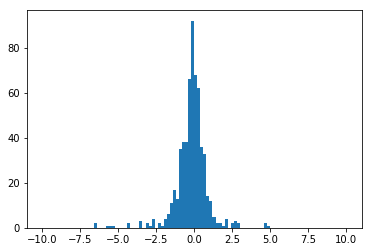

In [143]:
plt.hist(train.loc[ train.card_id.isin(his.groupby(['card_id']).purchase_amount.sum().reset_index().sort_values('purchase_amount')[:1000].card_id)].target,range=[-10,10],bins=100);

In [138]:
train.loc[ train.card_id.isin(['C_ID_5d8793d8a3'])]

first_active_month          card_id  feature_1  feature_2  feature_3  \
146463            2017-01  C_ID_5d8793d8a3          3          1          1   

          target  
146463 -2.090531

In [33]:
his.loc[ his.card_id.isin(train.loc[train.target>5].card_id)].groupby(['card_id']).purchase_1.mean()

card_id
C_ID_0059dbb9f0     -6.553921
C_ID_006b12ffc8     -1.416256
C_ID_0071913ad1      9.079992
C_ID_00f4bb8f88     -2.543841
C_ID_01064bd867     15.135352
C_ID_012c584a64      8.324765
C_ID_018b0f1bd6     -0.576228
C_ID_019b0ab302    -17.756566
C_ID_01b32b2e52      8.762390
C_ID_01d0bb4f9b      2.646986
C_ID_0216ce6aec    -12.902857
C_ID_0225b7a3a0      7.722579
C_ID_026fd7d7d5    -16.355320
C_ID_029a5d4521      5.529737
C_ID_02e34d2282      1.092612
C_ID_02ff93b580     15.302877
C_ID_0318d7cd79     16.405686
C_ID_034a860d9f     12.002813
C_ID_035a0f4bcb      9.722778
C_ID_03c17230e9     29.280882
C_ID_03ef21df0c     10.076939
C_ID_0418dcc471      7.559889
C_ID_0420cbd6b2      8.792719
C_ID_042e945709      3.711614
C_ID_04362c21dc     -5.521282
C_ID_0479e78bde      9.838164
C_ID_049a3f16c1      3.110329
C_ID_04cdbefd69      4.428621
C_ID_04d8156cec      5.404259
C_ID_04d8a73eb7     11.950702
C_ID_050dd3c541     12.501296
C_ID_050f6d4b70     20.165654
C_ID_0577624f5d     12.258670
C_

In [34]:
his.loc[ his.card_id.isin(train.loc[(train.target>-10)&(train.target<-2)].card_id)].groupby('card_id').purchase_1.mean()

card_id
C_ID_000616f4a8       7.968454
C_ID_0009d25138      12.795290
C_ID_000a6044e9       2.098344
C_ID_000dfced4d       9.594986
C_ID_000e19e469      10.235331
C_ID_0011762232       3.827216
C_ID_001a1de282      -0.518664
C_ID_001b68a34b      12.355399
C_ID_002249e66d     -15.161505
C_ID_0024aaee36       3.272605
C_ID_0026850f57       8.270823
C_ID_0032ee9a3d     -25.322019
C_ID_00350e7b9f       6.755924
C_ID_00370b000a       9.780488
C_ID_0038be1e92      13.204859
C_ID_003aca2f7d       2.126549
C_ID_003e62991e      -0.513826
C_ID_003efdb394     -24.712539
C_ID_003f8e42df       6.873486
C_ID_0041b0c7b1       8.627482
C_ID_0041e2e444     -20.090512
C_ID_0044b1e0e3       3.534062
C_ID_0045491250       7.259012
C_ID_0046a1c8f5      -9.519910
C_ID_005248e318       7.887921
C_ID_0055ce0eca     -17.532107
C_ID_005bef5d76       4.117205
C_ID_006313e1a4       5.561742
C_ID_0064449fcb       7.512452
C_ID_006b580b1a      10.122350
C_ID_00709d1aac       8.987033
C_ID_00731e44af      10.100789


In [218]:
his.loc[ his.card_id.isin(train.loc[(train.target<-2)&(train.target>-10)].card_id)].groupby(['card_id']).x_factor.sum()

card_id
C_ID_000616f4a8       8.161180
C_ID_0009d25138      11.726073
C_ID_000a6044e9       6.414201
C_ID_000dfced4d       7.223628
C_ID_000e19e469       9.811717
C_ID_0011762232       2.144806
C_ID_001a1de282       2.477037
C_ID_001b68a34b      47.007013
C_ID_002249e66d      -5.932180
C_ID_0024aaee36      10.898948
C_ID_0026850f57       2.888312
C_ID_0032ee9a3d    -188.261420
C_ID_00350e7b9f      24.331872
C_ID_00370b000a       7.810576
C_ID_0038be1e92       9.719819
C_ID_003aca2f7d       4.998509
C_ID_003e62991e      -0.491480
C_ID_003efdb394     -42.414228
C_ID_003f8e42df       1.110551
C_ID_0041b0c7b1      21.517221
C_ID_0041e2e444    -216.898133
C_ID_0044b1e0e3       1.615747
C_ID_0045491250      20.943905
C_ID_0046a1c8f5       5.350604
C_ID_005248e318       1.201861
C_ID_0055ce0eca      -3.931004
C_ID_005bef5d76       1.760829
C_ID_006313e1a4       2.066417
C_ID_0064449fcb       6.390714
C_ID_006b580b1a       4.891891
C_ID_00709d1aac       4.815672
C_ID_00731e44af       6.704752


In [8]:
his['purchase_1']=his.purchase_amount/his.numerical_1
new['purchase_1']=new.purchase_amount/new.numerical_1
his= pd.merge( his, subsector_trans_daily_max, on='subsector_id',how='left')
new= pd.merge( new, subsector_trans_daily_max, on='subsector_id',how='left')

In [9]:
his['x_factor']=his.purchase_1/his[0]
new['x_factor']=new.purchase_1/new[0]

In [40]:
his[:2]

authorized_flag          card_id  city_id category_1  installments  \
0                1  C_ID_4e6213e9bc       88          N             0   
1                1  C_ID_4e6213e9bc       88          N             0   

   category_3  merchant_category_id      merchant_id  month_lag  \
0           0                    80  M_ID_e020e9b302         -8   
1           0                   367  M_ID_86ec983688         -7   

   purchase_amount purchase_date  category_2  state_id  subsector_id  \
0                0    2017-06-25         1.0        16            37   
1                0    2017-07-15         1.0        16            16   

   category_4 most_recent_sales_range  numerical_1  due  purchase_1      0  \
0           1                       A    23.470597    0         0.0   43.4   
1           1                       A     1.092658    0         0.0  104.8   

   x_factor  
0       0.0  
1       0.0

In [10]:
his['purchase_2']=his.purchase_amount*his.numerical_1
new['purchase_2']= new.purchase_amount*new.numerical_1

In [4]:
his.sort_values(['card_id','subsector_id','merchant_id'])

authorized_flag          card_id  city_id category_1  installments  \
19867973                0  C_ID_00007093c1       76          N             2   
19867981                1  C_ID_00007093c1       76          N             2   
19867992                1  C_ID_00007093c1       76          N             2   
19868015                1  C_ID_00007093c1       76          N             1   
19867959                1  C_ID_00007093c1       -1          Y             1   
19867966                1  C_ID_00007093c1       -1          Y             1   
19867971                1  C_ID_00007093c1       -1          Y             1   
19867978                1  C_ID_00007093c1       -1          Y             1   
19867983                1  C_ID_00007093c1       -1          Y             1   
19867984                1  C_ID_00007093c1       -1          Y             1   
19867986                1  C_ID_00007093c1       -1          Y             1   
19867990                1  C_ID_00007093c1       -1          Y             1   
19867991                1  C_ID_00007093c1       -1          Y             1   
19867993                1  C_ID_00007093c1       -1          Y             1   
19867998                0  C_ID_00007093c1       -1          Y             1   
19868001                1  C_ID_00007093c1       -1          Y             1   
19868006                1  C_ID_00007093c1       -1          Y             1   
19868007                1  C_ID_00007093c1       -1          Y             1   
19868016                1  C_ID_00007093c1       -1          Y             1   
19868019                1  C_ID_00007093c1       -1          Y             1   
19868020                1  C_ID_00007093c1       -1          Y             1   
19868038                1  C_ID_00007093c1       -1          Y             1   
19868043                1  C_ID_00007093c1       -1          Y             1   
19868045                1  C_ID_00007093c1       -1          Y             1   
19868055                1  C_ID_00007093c1       -1          Y             1   
19868058                1  C_ID_00007093c1       -1          Y             1   
19868060                1  C_ID_00007093c1       -1          Y             1   
19868064                0  C_ID_00007093c1       -1          Y             1   
19868068                0  C_ID_00007093c1       -1          Y             1   
19868069                1  C_ID_00007093c1       -1          Y             1   
19868075                1  C_ID_00007093c1       -1          Y             1   
19868093                0  C_ID_00007093c1       -1          Y             1   
19868062                1  C_ID_00007093c1      244          N             2   
19868092                1  C_ID_00007093c1      244          N             3   
19868046                1  C_ID_00007093c1       76          N             1   
19868040                1  C_ID_00007093c1       76          N             1   
19867980                1  C_ID_00007093c1      244          N             1   
19868089                1  C_ID_00007093c1      244          N             1   
19867999                1  C_ID_00007093c1      244          N             3   
19868021                1  C_ID_00007093c1      244          N             2   
19868027                1  C_ID_00007093c1      244          N             2   
19868052                1  C_ID_00007093c1      244          N             1   
19868029                1  C_ID_00007093c1      244          N             1   
19867972                1  C_ID_00007093c1      244          N             3   
19868028                0  C_ID_00007093c1      244          N             1   
19868044                0  C_ID_00007093c1      244          N             3   
19867979                0  C_ID_00007093c1      244          N             2   
19868083                1  C_ID_00007093c1      244          N             3   
19867958                1  C_ID_00007093c1       76          N             3   
19867994  

In [43]:
new[:2]

authorized_flag          card_id  city_id category_1  installments  \
0                1  C_ID_415bb3a509      107          N             1   
1                1  C_ID_415bb3a509      140          N             1   

   category_3  merchant_category_id      merchant_id  month_lag  \
0           1                   307  M_ID_b0c793002c          1   
1           1                   307  M_ID_88920c89e8          1   

   purchase_amount purchase_date  category_2  state_id  subsector_id  \
0        -0.557574    2018-03-11         1.0         9            19   
1        -0.569580    2018-03-19         1.0         9            19   

   category_4 most_recent_sales_range  numerical_1  due  purchase_1     0  \
0           0                       C    -0.047556    0   11.724634  24.6   
1           0                       B     0.031763    0  -17.931906  24.6   

   x_factor  purchase_2  
0  0.476611    0.026516  
1 -0.728939   -0.018092

In [11]:
new_recent_purchase2_mean= new.pivot_table('purchase_2',columns='most_recent_sales_range',index='card_id',aggfunc=np.mean).reset_index()
his_recent_purchase2_mean= his.pivot_table('purchase_2',columns='most_recent_sales_range',index='card_id',aggfunc=np.mean).reset_index()
new_recent_purchase2_sum= new.pivot_table('purchase_2',columns='most_recent_sales_range',index='card_id',aggfunc=np.sum).reset_index()
his_recent_purchase2_sum= his.pivot_table('purchase_2',columns='most_recent_sales_range',index='card_id',aggfunc=np.sum).reset_index()

new_recent_xfactor_mean= new.pivot_table('x_factor',columns='most_recent_sales_range',index='card_id',aggfunc=np.mean).reset_index()
his_recent_xfactor_mean= his.pivot_table('x_factor',columns='most_recent_sales_range',index='card_id',aggfunc=np.mean).reset_index()
new_recent_xfactor_sum= new.pivot_table('x_factor',columns='most_recent_sales_range',index='card_id',aggfunc=np.sum).reset_index()
his_recent_xfactor_sum= his.pivot_table('x_factor',columns='most_recent_sales_range',index='card_id',aggfunc=np.sum).reset_index()


In [13]:
new_recent_xfactor_sum

most_recent_sales_range          card_id          A          B          C  \
0                        C_ID_00007093c1   0.142842        NaN        NaN   
1                        C_ID_0001238066   0.567696   1.144883   1.642186   
2                        C_ID_0001506ef0        NaN        NaN   0.171775   
3                        C_ID_0001793786   0.423741  -0.636254   0.794797   
4                        C_ID_000183fdda  -0.025678        NaN   0.162125   
5                        C_ID_0002709b5a   0.148046        NaN   0.235437   
6                        C_ID_000298032a        NaN        NaN        NaN   
7                        C_ID_0002ba3c2e        NaN  -0.003476   0.209204   
8                        C_ID_0002c7c2c1   0.696058  -6.754431   0.300018   
9                        C_ID_00032df08f  -0.098859  -0.001225   0.350631   
10                       C_ID_0003754056        NaN        NaN        NaN   
11                       C_ID_000377f6a0        NaN        NaN  -0.011117   
12                       C_ID_0003be3c83  -0.078689        NaN   0.036534   
13                       C_ID_0003f41435        NaN  -0.008654  -0.048556   
14                       C_ID_00042d509c   0.312725        NaN        NaN   
15                       C_ID_0004587331        NaN        NaN        NaN   
16                       C_ID_0004725b87   0.124894        NaN   0.921190   
17                       C_ID_0004888ddd        NaN  -0.005195        NaN   
18                       C_ID_0004b68c49   0.047186        NaN        NaN   
19                       C_ID_0004c2a5ab  -0.002516        NaN        NaN   
20                       C_ID_00057b99fe   0.050998        NaN        NaN   
21                       C_ID_000599daf9        NaN  -0.002504   0.676494   
22                       C_ID_0005f16cc8        NaN  -0.242424  -0.008364   
23                       C_ID_0006152db8        NaN        NaN        NaN   
24                       C_ID_000616f4a8   0.071687   0.493462   0.294752   
25                       C_ID_000664aa02  -0.000166   0.402975   0.217165   
26                       C_ID_00079fec55        NaN        NaN        NaN   
27                       C_ID_0007a60a33        NaN  -0.001092        NaN   
28                       C_ID_0007fe3157        NaN        NaN   0.481657   
29                       C_ID_000844d8f1   0.313443   0.286318   0.839499   
30                       C_ID_0008461020        NaN        NaN  -0.029558   
31                       C_ID_00087f3079        NaN        NaN        NaN   
32                       C_ID_0009010641   0.032961  -0.669818   0.471729   
33                       C_ID_0009150c11   0.156103  -0.025451  -0.039238   
34                       C_ID_000950bc78        NaN        NaN   0.259841   
35                       C_ID_00099cb909        NaN  -0.001678   0.570708   
36                       C_ID_0009ae74c1  -0.000625        NaN        NaN   
37                       C_ID_0009d25138        NaN        NaN   0.307282   
38                       C_ID_0009ef1dc2        NaN        NaN   0.190839   
39                       C_ID_000a6044e9  -0.001714  -0.004888   0.373698   
40                       C_ID_000a9864df        NaN   0.163461   0.349638   
41                       C_ID_000aa2220e  -0.000306  -0.000838   0.774108   
42                       C_ID_000acab1f6        NaN  -0.083073        NaN   
43                       C_ID_000b0305d9  -0.119709   0.213128        NaN   
44                       C_ID_000b24f797        NaN  -0.001724   0.377100   
45                       C_ID_000b3dbdea   0.136407  -0.395537   3.468885   
46                       C_ID_000b503737        NaN   0.223985   0.247983   
47                       C_ID_000b72c028  -0.000093   0.166863   1.689215   
48                       C_ID_000c00fc96        NaN        NaN        NaN   
49                       C_ID_000c8010ac   0.000202        NaN   0.998450   
50                       C_ID_000cadb59e -10.785640        NaN        NaN

In [58]:
(his.authorized_flag==0).sum(),(his.authorized_flag==1).sum()

(2629665, 27704115)

In [59]:
his[:2]

authorized_flag          card_id  city_id category_1  installments  \
0                1  C_ID_4e6213e9bc       88          N             0   
1                1  C_ID_4e6213e9bc       88          N             0   

   category_3  merchant_category_id      merchant_id  month_lag  \
0           0                    80  M_ID_e020e9b302         -8   
1           0                   367  M_ID_86ec983688         -7   

   purchase_amount purchase_date  category_2  state_id  subsector_id  \
0        -0.703331    2017-06-25         1.0        16            37   
1        -0.733128    2017-07-15         1.0        16            16   

   category_4 most_recent_sales_range  numerical_1  due  purchase_1      0  \
0           1                       A    23.470597    0   -0.029966   43.4   
1           1                       A     1.092658    0   -0.670959  104.8   

   x_factor  purchase_2  
0 -0.000690  -16.507597  
1 -0.006402   -0.801059

In [79]:
his.groupby(['card_id','authorized_flag']).size().reset_index()

card_id  authorized_flag     0
0       C_ID_00007093c1                0    35
1       C_ID_00007093c1                1   114
2       C_ID_0001238066                0     3
3       C_ID_0001238066                1   120
4       C_ID_0001506ef0                0     4
5       C_ID_0001506ef0                1    64
6       C_ID_0001793786                0    27
7       C_ID_0001793786                1   195
8       C_ID_000183fdda                0     7
9       C_ID_000183fdda                1   142
10      C_ID_00024e244b                0    17
11      C_ID_00024e244b                1    56
12      C_ID_0002709b5a                0     6
13      C_ID_0002709b5a                1    67
14      C_ID_00027503e2                0    19
15      C_ID_00027503e2                1    26
16      C_ID_000298032a                0     3
17      C_ID_000298032a                1    30
18      C_ID_0002ba3c2e                0    15
19      C_ID_0002ba3c2e                1    56
20      C_ID_0002c7c2c1                0    10
21      C_ID_0002c7c2c1                1    61
22      C_ID_00032df08f                0    23
23      C_ID_00032df08f                1   130
24      C_ID_0003754056                0     1
25      C_ID_0003754056                1    38
26      C_ID_000377f6a0                0     6
27      C_ID_000377f6a0                1    25
28      C_ID_0003be3c83                0    25
29      C_ID_0003be3c83                1   151
30      C_ID_0003f41435                0     6
31      C_ID_0003f41435                1   266
32      C_ID_00042d509c                0    53
33      C_ID_00042d509c                1    20
34      C_ID_0004587331                0     2
35      C_ID_0004587331                1    12
36      C_ID_0004725b87                0     7
37      C_ID_0004725b87                1    71
38      C_ID_0004888ddd                0     5
39      C_ID_0004888ddd                1    37
40      C_ID_0004b68c49                1     5
41      C_ID_0004c2a5ab                0     3
42      C_ID_0004c2a5ab                1    75
43      C_ID_00057b99fe                0     2
44      C_ID_00057b99fe                1    34
45      C_ID_000599daf9                0     2
46      C_ID_000599daf9                1    35
47      C_ID_0005b2f279                1    16
48      C_ID_0005b5804f                1     9
49      C_ID_0005f16cc8                0    17
50      C_ID_0005f16cc8                1   138
51      C_ID_0006152db8                0    10
52      C_ID_0006152db8                1    78
53      C_ID_000616f4a8                0     2
54      C_ID_000616f4a8                1    39
55      C_ID_000664aa02                1    37
56      C_ID_00079fec55                0     9
57      C_ID_00079fec55                1    41
58      C_ID_0007a60a33                0    11
59      C_ID_0007a60a33                1    20
60      C_ID_0007fe3157                0    10
61      C_ID_0007fe3157                1   187
62      C_ID_000844d8f1                0     4
63      C_ID_000844d8f1                1   148
64      C_ID_0008461020                1     8
65      C_ID_00087f3079                0    11
66      C_ID_00087f3079                1   105
67      C_ID_0009010641                0     4
68      C_ID_0009010641                1    22
69      C_ID_0009150c11                1     9
70      C_ID_000950bc78                1    20
71      C_ID_00099cb909                0     5
72      C_ID_00099cb909                1    39
73      C_ID_0009ae74c1                0    21
74      C_ID_0009ae74c1                1   207
75      C_ID_0009d25138                0     4
76      C_ID_0009d25138                1    46
77      C_ID_0009ef1dc2                1    18
78      C_ID_000a6044e9                0     8
79      C_ID_000a6044e9                1    76
80      C_ID_000a9864df                1    21
81      C_ID_000aa2220e                0    19
82      C_ID_000aa2220e                1   136
83      C_ID_000acab1f6                0     7
84      C_ID_000acab1

In [12]:
temp= his.groupby(['card_id','authorized_flag']).size().reset_index()
card_auth= temp.pivot_table( 0,columns='authorized_flag',index='card_id',aggfunc=np.sum).reset_index().fillna(0)
card_auth['non_auth_rate']= card_auth[0]/(card_auth[0]+card_auth[1])

In [13]:
card_auth

authorized_flag          card_id      0       1  non_auth_rate
0                C_ID_00007093c1   35.0   114.0       0.234899
1                C_ID_0001238066    3.0   120.0       0.024390
2                C_ID_0001506ef0    4.0    64.0       0.058824
3                C_ID_0001793786   27.0   195.0       0.121622
4                C_ID_000183fdda    7.0   142.0       0.046980
5                C_ID_00024e244b   17.0    56.0       0.232877
6                C_ID_0002709b5a    6.0    67.0       0.082192
7                C_ID_00027503e2   19.0    26.0       0.422222
8                C_ID_000298032a    3.0    30.0       0.090909
9                C_ID_0002ba3c2e   15.0    56.0       0.211268
10               C_ID_0002c7c2c1   10.0    61.0       0.140845
11               C_ID_00032df08f   23.0   130.0       0.150327
12               C_ID_0003754056    1.0    38.0       0.025641
13               C_ID_000377f6a0    6.0    25.0       0.193548
14               C_ID_0003be3c83   25.0   151.0       0.142045
15               C_ID_0003f41435    6.0   266.0       0.022059
16               C_ID_00042d509c   53.0    20.0       0.726027
17               C_ID_0004587331    2.0    12.0       0.142857
18               C_ID_0004725b87    7.0    71.0       0.089744
19               C_ID_0004888ddd    5.0    37.0       0.119048
20               C_ID_0004b68c49    0.0     5.0       0.000000
21               C_ID_0004c2a5ab    3.0    75.0       0.038462
22               C_ID_00057b99fe    2.0    34.0       0.055556
23               C_ID_000599daf9    2.0    35.0       0.054054
24               C_ID_0005b2f279    0.0    16.0       0.000000
25               C_ID_0005b5804f    0.0     9.0       0.000000
26               C_ID_0005f16cc8   17.0   138.0       0.109677
27               C_ID_0006152db8   10.0    78.0       0.113636
28               C_ID_000616f4a8    2.0    39.0       0.048780
29               C_ID_000664aa02    0.0    37.0       0.000000
30               C_ID_00079fec55    9.0    41.0       0.180000
31               C_ID_0007a60a33   11.0    20.0       0.354839
32               C_ID_0007fe3157   10.0   187.0       0.050761
33               C_ID_000844d8f1    4.0   148.0       0.026316
34               C_ID_0008461020    0.0     8.0       0.000000
35               C_ID_00087f3079   11.0   105.0       0.094828
36               C_ID_0009010641    4.0    22.0       0.153846
37               C_ID_0009150c11    0.0     9.0       0.000000
38               C_ID_000950bc78    0.0    20.0       0.000000
39               C_ID_00099cb909    5.0    39.0       0.113636
40               C_ID_0009ae74c1   21.0   207.0       0.092105
41               C_ID_0009d25138    4.0    46.0       0.080000
42               C_ID_0009ef1dc2    0.0    18.0       0.000000
43               C_ID_000a6044e9    8.0    76.0       0.095238
44               C_ID_000a9864df    0.0    21.0       0.000000
45               C_ID_000aa2220e   19.0   136.0       0.122581
46               C_ID_000acab1f6    7.0   226.0       0.030043
47               C_ID_000b0305d9    1.0   115.0       0.008621
48               C_ID_000b13135b   17.0    88.0       0.161905
49               C_ID_000b24f797   16.0    54.0       0.228571
50               C_ID_000b3dbdea    1.0    62.0       0.015873
51               C_ID_000b503737   23.0   185.0       0.110577
52               C_ID_000b72c028    0.0    47.0       0.000000
53               C_ID_000c00fc96   19.0   151.0       0.111765
54               C_ID_000c1a998b    3.0    41.0       0.068182
55               C_ID_000c778b05    1.0    22.0       0.043478
56               C_ID_000c8010ac    5.0    19.0       0.208333
57               C_ID_000cadb0f6   20.0    19.0       0.512821
58               C_ID_000cadb59e    0.0   149.0       0.000000
59               C_ID_000ce910cb    4.0    64.0       0.058824
60               C_ID_000cfb6503   13.0   102.0       0.113043
61               C_ID_000d005e43    0.0   161.0       0.000000
62               C_ID_000d0a81c

In [20]:
temp_new= new.loc[:,['card_id','authorized_flag']]
temp_new.columns= ['card_id','dummy']

In [21]:
temp_new= pd.merge(temp_new, card_auth.loc[:,['card_id','non_auth_rate']],on='card_id',how='left')
print('..')
temp_new= pd.merge(temp_new, new_subsector_trans_merchant_uniq.loc[:,['card_id','subsector_merchant_nuniq']],on='card_id',how='left')
print('..')
new2= pd.concat([new, temp_new], axis= 1)
temp_new= new.loc[:,['card_id','authorized_flag']]
temp_new.columns= ['card_id','dummy']
temp_new= pd.merge(temp_new, new_subsector_trans_merchant_cnt.loc[:,['card_id','subsector_merchant_cnt']],on='card_id',how='left')
print('..')
temp_new= pd.merge(temp_new, new_recent_purchase2_mean, on='card_id',how='left')
print('..')
new2= pd.concat([new2, temp_new], axis= 1)
temp_new= new.loc[:,['card_id','authorized_flag']]
temp_new.columns= ['card_id','dummy']
temp_new= pd.merge(temp_new, new_recent_purchase2_sum, on='card_id',how='left')
print('..')
temp_new= pd.merge(temp_new, new_recent_xfactor_mean,on='card_id',how='left')
print('..')
temp_new= pd.merge(temp_new, new_recent_xfactor_sum,on='card_id',how='left')

..
..
..
..
..
..


In [22]:
new2= pd.concat([new2, temp_new], axis= 1)

In [25]:
new2

authorized_flag          card_id  city_id category_1  installments  \
0                     1.0  C_ID_415bb3a509    107.0          N           1.0   
1                     1.0  C_ID_415bb3a509    140.0          N           1.0   
2                     1.0  C_ID_415bb3a509    330.0          N           1.0   
3                     1.0  C_ID_415bb3a509     -1.0          Y           1.0   
4                     1.0  C_ID_ef55cf8d4b     -1.0          Y           1.0   
5                     1.0  C_ID_ef55cf8d4b    231.0          N           1.0   
6                     1.0  C_ID_ef55cf8d4b     69.0          N           1.0   
7                     1.0  C_ID_ef55cf8d4b    231.0          N           1.0   
8                     1.0  C_ID_ef55cf8d4b     69.0          N           1.0   
9                     1.0  C_ID_ef55cf8d4b     69.0          N           1.0   
10                    1.0  C_ID_ef55cf8d4b     69.0          N          -1.0   
11                    1.0  C_ID_ef55cf8d4b     69.0          N           1.0   
12                    1.0  C_ID_ef55cf8d4b     69.0          N           1.0   
13                    1.0  C_ID_ef55cf8d4b     69.0          N           1.0   
14                    1.0  C_ID_ef55cf8d4b     -1.0          Y           1.0   
15                    1.0  C_ID_ef55cf8d4b    231.0          N           1.0   
16                    1.0  C_ID_ef55cf8d4b     69.0          N           1.0   
17                    1.0  C_ID_ef55cf8d4b     69.0          N           1.0   
18                    1.0  C_ID_ef55cf8d4b    231.0          N           3.0   
19                    1.0  C_ID_ef55cf8d4b    231.0          N           1.0   
20                    1.0  C_ID_ef55cf8d4b    231.0          N           1.0   
21                    1.0  C_ID_ef55cf8d4b     -1.0          Y           3.0   
22                    1.0  C_ID_ef55cf8d4b    231.0          N           1.0   
23                    1.0  C_ID_ef55cf8d4b     69.0          N           2.0   
24                    1.0  C_ID_ef55cf8d4b     -1.0          Y          12.0   
25                    1.0  C_ID_ef55cf8d4b     69.0          N           1.0   
26                    1.0  C_ID_241a01e9d9     69.0          N           3.0   
27                    1.0  C_ID_241a01e9d9    188.0          N           6.0   
28                    1.0  C_ID_a97720321f     69.0          N           0.0   
29                    1.0  C_ID_a97720321f     69.0          N           0.0   
30                    1.0  C_ID_a97720321f     69.0          N           0.0   
31                    1.0  C_ID_a97720321f     69.0          N           0.0   
32                    1.0  C_ID_a97720321f     69.0          N           0.0   
33                    1.0  C_ID_a97720321f     69.0          N           0.0   
34                    1.0  C_ID_a97720321f    246.0          N           0.0   
35                    1.0  C_ID_a97720321f     69.0          N           0.0   
36                    1.0  C_ID_a97720321f     69.0          N           0.0   
37                    1.0  C_ID_a97720321f     69.0          N           0.0   
38                    1.0  C_ID_a97720321f     69.0          N           0.0   
39                    1.0  C_ID_a97720321f     69.0          N           0.0   
40                    1.0  C_ID_a97720321f     69.0          N           0.0   
41                    1.0  C_ID_fb0875cd28    271.0          N           0.0   
42                    1.0  C_ID_fb0875cd28    140.0          N           0.0   
43                    1.0  C_ID_fb0875cd28    271.0          N           0.0   
44                    1.0  C_ID_fb0875cd28    271.0          N           0.0   
45                    1.0  C_ID_fb0875cd28    140.0          N           0.0   
46                    1.0  C_ID_fb0875cd28     69.0          N           0.0   
47                    1.0  C_ID_fb0875cd28    331.0          N           0.0   
48                    1.0  C_ID_8c9ba46f19     69.0          N           0.0   
49        

In [24]:
new2.drop('dummy',axis=1,inplace=True)

In [ ]:
temp_his= his.loc[:,['card_id','authorized_flag']]
temp_his.columns= ['card_id','dummy']
temp_his= pd.merge(his, card_auth.loc[:,['card_id','non_auth_rate']],on='card_id',how='left')
print('..')
temp_his= pd.merge(his, his_subsector_trans_merchant_uniq.loc[:,['card_id','subsector_merchant_nuniq']],on='card_id',how='left')
print('..')
his2= pd.concat([his, temp_his], axis= 1)
temp_his= his.loc[:,['card_id','authorized_flag']]
temp_his.columns= ['card_id','dummy']
temp_his= pd.merge(his, his_subsector_trans_merchant_cnt.loc[:,['card_id','subsector_merchant_cnt']],on='card_id',how='left')
print('..')
temp_his= pd.merge(his, his_recent_purchase2_mean, on='card_id',how='left')
print('..')
his2= pd.concat([his2, temp_his], axis= 1)
temp_his= his.loc[:,['card_id','authorized_flag']]
temp_his.columns= ['card_id','dummy']
temp_his= pd.merge(his, his_recent_purchase2_sum, on='card_id',how='left')
print('..')
temp_his= pd.merge(his, his_recent_xfactor_mean,on='card_id',how='left')
print('..')
temp_his= pd.merge(his, his_recent_xfactor_sum,on='card_id',how='left')
print('..')
temp_his= pd.merge( his, merchant_time_dist, on='card_id',how='left')

..


In [106]:
new2= pd.concat([new2, temp_new], axis= 1)

most_recent_sales_range          card_id          A        B         C  \
0                        C_ID_00007093c1   0.037744      NaN       NaN   
1                        C_ID_0001238066 -22.412307 -0.22277  0.020328   

most_recent_sales_range         D         E  
0                        0.038607  0.031232  
1                        0.022997  0.028761

In [14]:
pd.merge( new_subsector_trans_merchant_uniq, new_subsector_trans_merchant_cnt,on=['card_id','subsector_id'],how='left')

card_id  subsector_id  subsector_merchant_nuniq  \
0        C_ID_00007093c1            21                         1   
1        C_ID_00007093c1            29                         1   
2        C_ID_0001238066             7                         1   
3        C_ID_0001238066            16                         2   
4        C_ID_0001238066            16                         2   
5        C_ID_0001238066            17                         1   
6        C_ID_0001238066            19                         5   
7        C_ID_0001238066            19                         5   
8        C_ID_0001238066            19                         5   
9        C_ID_0001238066            19                         5   
10       C_ID_0001238066            19                         5   
11       C_ID_0001238066            27                         2   
12       C_ID_0001238066            27                         2   
13       C_ID_0001238066            29                         4   
14       C_ID_0001238066            29                         4   
15       C_ID_0001238066            29                         4   
16       C_ID_0001238066            29                         4   
17       C_ID_0001238066            31                         1   
18       C_ID_0001238066            33                         1   
19       C_ID_0001238066            37                         8   
20       C_ID_0001238066            37                         8   
21       C_ID_0001238066            37                         8   
22       C_ID_0001238066            37                         8   
23       C_ID_0001238066            37                         8   
24       C_ID_0001238066            37                         8   
25       C_ID_0001238066            37                         8   
26       C_ID_0001238066            37                         8   
27       C_ID_0001506ef0            33                         1   
28       C_ID_0001506ef0            34                         0   
29       C_ID_0001793786             7                         1   
30       C_ID_0001793786            12                         1   
31       C_ID_0001793786            16                         1   
32       C_ID_0001793786            19                         3   
33       C_ID_0001793786            19                         3   
34       C_ID_0001793786            19                         3   
35       C_ID_0001793786            21                         1   
36       C_ID_0001793786            24                         1   
37       C_ID_0001793786            25                         1   
38       C_ID_0001793786            27                         4   
39       C_ID_0001793786            27                         4   
40       C_ID_0001793786            27                         4   
41       C_ID_0001793786            27                         4   
42       C_ID_0001793786            29                         3   
43       C_ID_0001793786            29                         3   
44       C_ID_0001793786            29                         3   
45       C_ID_0001793786            30                         1   
46       C_ID_0001793786            33                         2   
47       C_ID_0001793786            33                         2   
48       C_ID_0001793786            36                         1   
49       C_ID_0001793786            37                        10   
50       C_ID_0001793786            37                        10   
51       C_ID_0001793786            37                        10   
52       C_ID_0001793786            37                        10   
53       C_ID_0001793786            37                        10   
54       C_ID_0001793786            37                        10   
55       C_ID_0001793786            37                        10   
56       C_ID_0001793786            37                        10   
57       C_ID_0001793786            37                        10   
58   

In [18]:
new_subsector_trans_merchant_uniq[:10]

card_id  subsector_id  subsector_merchant_nuniq
0  C_ID_00007093c1            21                         1
1  C_ID_00007093c1            29                         1
2  C_ID_0001238066             7                         1
3  C_ID_0001238066            16                         2
4  C_ID_0001238066            17                         1
5  C_ID_0001238066            19                         5
6  C_ID_0001238066            27                         2
7  C_ID_0001238066            29                         4
8  C_ID_0001238066            31                         1
9  C_ID_0001238066            33                         1

In [38]:
his_merchant_trans_dist= his.groupby(['card_id','subsector_id','merchant_id','purchase_date']).size().reset_index().groupby(['card_id','merchant_id']).size().reset_index()
his_merchant_trans_dist[:5]

card_id      merchant_id  0
0  C_ID_00007093c1  M_ID_0379adb435  4
1  C_ID_00007093c1  M_ID_06a8d84366  1
2  C_ID_00007093c1  M_ID_0dabc5a70c  2
3  C_ID_00007093c1  M_ID_109e9d2b1d  2
4  C_ID_00007093c1  M_ID_15446e939c  1

In [39]:
his_merchant_trans_dist= pd.merge(his_merchant_trans_dist, mer.loc[:,['merchant_id','subsector_id']],on='merchant_id',how='left')
his_merchant_trans_dist[:5]

card_id      merchant_id  0  subsector_id_x  subsector_id_y
0  C_ID_00007093c1  M_ID_0379adb435  4              18              18
1  C_ID_00007093c1  M_ID_06a8d84366  1              15              15
2  C_ID_00007093c1  M_ID_0dabc5a70c  2              10              10
3  C_ID_00007093c1  M_ID_109e9d2b1d  2              16              16
4  C_ID_00007093c1  M_ID_15446e939c  1              34              34

In [40]:
his_merchant_fickleness= pd.merge( merchant_trans_dist.groupby(['card_id','subsector_id'])[0].sum().reset_index(),his_subsector_trans_merchant_uniq, on=['card_id','subsector_id'], how='left')
his_merchant_fickleness[:20]

card_id  subsector_id   0  subsector_merchant_nuniq
0   C_ID_00007093c1             8  24                       1.0
1   C_ID_00007093c1            10   2                       1.0
2   C_ID_00007093c1            12   1                       1.0
3   C_ID_00007093c1            15   1                       1.0
4   C_ID_00007093c1            16   2                       1.0
5   C_ID_00007093c1            18  11                       5.0
6   C_ID_00007093c1            19  41                       4.0
7   C_ID_00007093c1            21   4                       1.0
8   C_ID_00007093c1            27   4                       4.0
9   C_ID_00007093c1            29   3                       1.0
10  C_ID_00007093c1            33  21                       6.0
11  C_ID_00007093c1            34   4                       2.0
12  C_ID_0001238066             1   3                       3.0
13  C_ID_0001238066             3   1                       1.0
14  C_ID_0001238066             7   2                       3.0
15  C_ID_0001238066            10   1                       1.0
16  C_ID_0001238066            12   2                       2.0
17  C_ID_0001238066            15   2                       2.0
18  C_ID_0001238066            16   5                       3.0
19  C_ID_0001238066            17   1                       NaN

In [42]:
his_merchant_fickleness['fickleness']=merchant_fickleness.subsector_merchant_nuniq/merchant_fickleness[0]
his_merchant_fickleness= merchant_fickleness.groupby(['card_id']).fickleness.mean().reset_index()

In [43]:
merchant_fickleness[:3]

card_id  fickleness
0  C_ID_00007093c1    0.496902
1  C_ID_0001238066    0.870089
2  C_ID_0001506ef0    0.743867

In [47]:
new_merchant_trans_dist= new.groupby(['card_id','subsector_id','merchant_id','purchase_date']).size().reset_index().groupby(['card_id','merchant_id']).size().reset_index()
new_merchant_trans_dist= pd.merge(new_merchant_trans_dist, mer.loc[:,['merchant_id','subsector_id']],on='merchant_id',how='left')
new_merchant_fickleness= pd.merge( new_merchant_trans_dist.groupby(['card_id','subsector_id'])[0].sum().reset_index(),his_subsector_trans_merchant_uniq, on=['card_id','subsector_id'], how='left')
new_merchant_fickleness['fickleness']=new_merchant_fickleness.subsector_merchant_nuniq/new_merchant_fickleness[0]
new_merchant_fickleness= new_merchant_fickleness.groupby(['card_id']).fickleness.mean().reset_index()

In [67]:
agg_func= {
    'purchase_amount': ['sum', 'mean', 'max'],
    'x_factor': ['sum', 'mean', 'max'],
    'purchase_1': ['sum', 'mean', 'max'],
    'purchase_2': ['sum', 'mean', 'max'],
    'category_4': ['sum'],
    'due': ['sum','mean','max'],
}
his_final= his.groupby(['card_id']).agg(agg_func)
his_final.columns= [ '_'.join(col).strip() for col in his_final.columns.values]
his_final.reset_index( inplace= True)
his_final= pd.merge( his_final, his_merchant_fickleness, on='card_id',how='left')
his_final= pd.merge( his_final, card_auth, on='card_id',how='left')
his_final= pd.merge( his_final, his_recent_xfactor_mean, on='card_id',how='left')
his_final= pd.merge( his_final, his_recent_purchase2_mean, on='card_id',how='left')

In [79]:
new_final= new.groupby(['card_id']).agg(agg_func)
new_final.columns= [ '_'.join(col).strip() for col in new_final.columns.values]
new_final.reset_index( inplace= True)
new_final= pd.merge( new_final, new_merchant_fickleness, on='card_id',how='left')
new_final= pd.merge( new_final, new_recent_xfactor_mean, on='card_id',how='left')
new_final= pd.merge( new_final, new_recent_purchase2_mean, on='card_id',how='left')

In [69]:
his_final[:2]

card_id  purchase_amount_sum  purchase_amount_mean  \
0  C_ID_00007093c1                    2              0.013423   
1  C_ID_00007093c1                    2              0.013423   

   purchase_amount_max  x_factor_sum  x_factor_mean  x_factor_max  \
0                    1      0.043385       0.000291      0.021693   
1                    1      0.043385       0.000291      0.021693   

   purchase_1_sum  purchase_1_mean  purchase_1_max  purchase_2_sum  \
0        1.449075         0.009725        0.724538        2.760381   
1        1.449075         0.009725        0.724538        2.760381   

   purchase_2_mean  purchase_2_max  category_4_sum  due_sum  due_mean  \
0         0.018526         1.38019              49       19  0.127517   
1         0.018526         1.38019              49       19  0.127517   

   due_max  subsector_id  0_x  subsector_merchant_nuniq   0_y      1  \
0        4             8   24                       1.0  35.0  114.0   
1        4            10    2                       1.0  35.0  114.0   

   non_auth_rate  A_x  B_x       C_x  D_x  E_x  A_y  B_y      C_y  D_y  E_y  
0       0.234899  0.0  0.0  0.003099  0.0  0.0  0.0  0.0  0.19717  0.0  0.0  
1       0.234899  0.0  0.0  0.003099  0.0  0.0  0.0  0.0  0.19717  0.0  0.0

In [83]:
his_final.columns= [ 'his_'+str(col) if col != 'card_id' else col for col in his_final.columns.values]
new_final.columns= [ 'new_'+str(col) if col != 'card_id' else col for col in new_final.columns.values]
train2= train.merge( new_final, on='card_id',how='left')
train2= train2.merge( his_final, on='card_id',how='left')
test2= test.merge( new_final, on='card_id',how='left')
test2= test2.merge( his_final, on='card_id',how='left')

In [84]:
train2[:2]

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-06-01  C_ID_92a2005557          5          2          1   

     target  new_new_purchase_amount_sum  new_new_purchase_amount_mean  \
0 -0.820283                   -13.242188                     -0.575684   
1 -0.820283                   -13.242188                     -0.575684   

   new_new_purchase_amount_max  new_new_x_factor_sum  new_new_x_factor_mean  \
0                    -0.296143            -20.296033              -0.882436   
1                    -0.296143            -20.296033              -0.882436   

   new_new_x_factor_max  new_new_purchase_1_sum  new_new_purchase_1_mean  \
0               2.21431             -742.924871               -32.301081   
1               2.21431             -742.924871               -32.301081   

   new_new_purchase_1_max  new_new_purchase_2_sum  new_new_purchase_2_mean  \
0               33.500553             -331.918405               -14.431235   
1               33.500553             -331.918405               -14.431235   

   new_new_purchase_2_max  new_new_category_4_sum  new_new_due_sum  \
0                0.041363                    19.0              0.0   
1                0.041363                    19.0              0.0   

   new_new_due_mean  new_new_due_max  new_new_fickleness  new_new_A_x  \
0               0.0              0.0            4.072727    -0.008008   
1               0.0              0.0            4.072727    -0.008008   

   new_new_B_x  new_new_C_x  new_new_D_x  new_new_E_x  new_new_A_y  \
0    -0.026729    -1.512283    -2.072097     0.244405   -47.376157   
1    -0.026729    -1.512283    -2.072097     0.244405   -47.376157   

   new_new_B_y  new_new_C_y  new_new_D_y  new_new_E_y  \
0    -0.355474    -0.011728     0.012528     0.029874   
1    -0.355474    -0.011728     0.012528     0.029874   

   his_his_his_purchase_amount_sum  his_his_his_purchase_amount_mean  \
0                                2                          0.007547   
1                                2                          0.007547   

   his_his_his_purchase_amount_max  his_his_his_x_factor_sum  \
0                                2                 -2.251431   
1                                2                 -2.251431   

   his_his_his_x_factor_mean  his_his_his_x_factor_max  \
0                  -0.008693                       0.0   
1                  -0.008693                       0.0   

   his_his_his_purchase_1_sum  his_his_his_purchase_1_mean  \
0                  -53.133777                     -0.20515   
1                  -53.133777                     -0.20515   

   his_his_his_purchase_1_max  his_his_his_purchase_2_sum  \
0                         0.0                   -0.075282   
1                         0.0                   -0.075282   

   his_his_his_purchase_2_mean  his_his_his_purchase_2_max  \
0                    -0.000291                         0.0   
1                    -0.000291                         0.0   

   his_his_his_category_4_sum  his_his_his_due_sum  his_his_his_due_mean  \
0                         253                    0                   0.0   
1                         253                    0                   0.0   

   his_his_his_due_max  his_his_his_subsector_id  his_his_his_0_x  \
0                    0                         7               19   
1                    0                         8                3   

   his_his_his_subsector_merchant_nuniq  his_his_his_0_y  his_his_his_1  \
0                                   2.0             13.0          252.0   
1                                   1.0             13.0          252.0   

   his_his_his_non_auth_rate  his_his_his_A_x  his_his_his_B_x  \
0                   0.049057              0.0              0.0   
1                   0.049057              0.0              0.0   

   his_his_his_C_x  his_his_his_D_x

In [88]:
target= train2.target
train3=train2.drop(['card_id','target','first_active_month'], axis= 1)
test3= test2.drop(['card_id','first_active_month'],axis=1)
import lightgbm as lgb
param = {'num_leaves': 111,
         'min_data_in_leaf': 149, 
         'objective':'regression',
         'max_depth': 9,
         'learning_rate': 0.005,
         "boosting": "gbdt",
         "feature_fraction": 0.7522,
         "bagging_freq": 1,
         "bagging_fraction": 0.7083 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2634,
         "random_state": 133,
         "verbosity": -1}
from sklearn.model_selection import KFold
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(train3))
predictions = np.zeros(len(test3))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train3.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train3.iloc[trn_idx],
                           label=target.iloc[trn_idx]
                          )
    val_data = lgb.Dataset(train3.iloc[val_idx],
                           label=target.iloc[val_idx]
                          )

    num_round = 10000
    clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=100,
                    early_stopping_rounds = 100)
    
    oof[val_idx] = clf.predict(train3.iloc[val_idx], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = train3.columns
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test3, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(mean_squared_error(oof, target)**0.5))

fold n°0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.74241	valid_1's rmse: 3.75777
[200]	training's rmse: 3.70549	valid_1's rmse: 3.72366
[300]	training's rmse: 3.67573	valid_1's rmse: 3.69634
[400]	training's rmse: 3.6518	valid_1's rmse: 3.67425
[500]	training's rmse: 3.63195	valid_1's rmse: 3.65596
[600]	training's rmse: 3.61668	valid_1's rmse: 3.6418
[700]	training's rmse: 3.60311	valid_1's rmse: 3.62906
[800]	training's rmse: 3.5916	valid_1's rmse: 3.61824
[900]	training's rmse: 3.58151	valid_1's rmse: 3.60871
[1000]	training's rmse: 3.57218	valid_1's rmse: 3.59992
[1100]	training's rmse: 3.5627	valid_1's rmse: 3.59102
[1200]	training's rmse: 3.55333	valid_1's rmse: 3.58225
[1300]	training's rmse: 3.5446	valid_1's rmse: 3.57411
[1400]	training's rmse: 3.53622	valid_1's rmse: 3.56629
[1500]	training's rmse: 3.52847	valid_1's rmse: 3.55907
[1600]	training's rmse: 3.52055	valid_1's rmse: 3.55152
[1700]	training's rmse: 3.5126	valid_1's rmse:

[4400]	training's rmse: 3.33172	valid_1's rmse: 3.37144
[4500]	training's rmse: 3.32534	valid_1's rmse: 3.36552
[4600]	training's rmse: 3.31943	valid_1's rmse: 3.35998
[4700]	training's rmse: 3.3132	valid_1's rmse: 3.35421
[4800]	training's rmse: 3.307	valid_1's rmse: 3.34844
[4900]	training's rmse: 3.30045	valid_1's rmse: 3.34238
[5000]	training's rmse: 3.2943	valid_1's rmse: 3.33671
[5100]	training's rmse: 3.28903	valid_1's rmse: 3.33179
[5200]	training's rmse: 3.2828	valid_1's rmse: 3.32599
[5300]	training's rmse: 3.27663	valid_1's rmse: 3.32027
[5400]	training's rmse: 3.2707	valid_1's rmse: 3.31472
[5500]	training's rmse: 3.26488	valid_1's rmse: 3.30927
[5600]	training's rmse: 3.25927	valid_1's rmse: 3.30413
[5700]	training's rmse: 3.25328	valid_1's rmse: 3.29853
[5800]	training's rmse: 3.24765	valid_1's rmse: 3.2933
[5900]	training's rmse: 3.24156	valid_1's rmse: 3.28759
[6000]	training's rmse: 3.2354	valid_1's rmse: 3.28182
[6100]	training's rmse: 3.22961	valid_1's rmse: 3.27634


[8800]	training's rmse: 3.08256	valid_1's rmse: 3.1563
[8900]	training's rmse: 3.07692	valid_1's rmse: 3.15101
[9000]	training's rmse: 3.07182	valid_1's rmse: 3.14625
[9100]	training's rmse: 3.06689	valid_1's rmse: 3.14161
[9200]	training's rmse: 3.06136	valid_1's rmse: 3.1364
[9300]	training's rmse: 3.05653	valid_1's rmse: 3.13193
[9400]	training's rmse: 3.0516	valid_1's rmse: 3.12723
[9500]	training's rmse: 3.04697	valid_1's rmse: 3.12284
[9600]	training's rmse: 3.04154	valid_1's rmse: 3.11769
[9700]	training's rmse: 3.03654	valid_1's rmse: 3.11304
[9800]	training's rmse: 3.03175	valid_1's rmse: 3.10845
[9900]	training's rmse: 3.0265	valid_1's rmse: 3.10347
[10000]	training's rmse: 3.02179	valid_1's rmse: 3.09907
Did not meet early stopping. Best iteration is:
[10000]	training's rmse: 3.02179	valid_1's rmse: 3.09907


KeyboardInterrupt: 

In [89]:
new_final[:2]

card_id  new_new_purchase_amount_sum  new_new_purchase_amount_mean  \
0  C_ID_00007093c1                    -1.985352                     -0.661621   
1  C_ID_0001238066                   -15.523438                     -0.575195   

   new_new_purchase_amount_max  new_new_x_factor_sum  new_new_x_factor_mean  \
0                    -0.656738              1.064872               0.354957   
1                    -0.078308              5.874599               0.225946   

   new_new_x_factor_max  new_new_purchase_1_sum  new_new_purchase_1_mean  \
0              0.749407               36.927979                12.309326   
1              0.573199              217.931978                 8.381999   

   new_new_purchase_1_max  new_new_purchase_2_sum  new_new_purchase_2_mean  \
0               13.809861                0.107588                 0.035863   
1               21.520630             -135.519401                -5.212285   

   new_new_purchase_2_max  new_new_category_4_sum  new_new_due_sum  \
0                0.038613                       3                0   
1                0.042570                      10               12   

   new_new_due_mean  new_new_due_max  new_new_fickleness  new_new_A_x  \
0          0.000000                0            1.000000     0.142842   
1          0.444444                8            2.071429     0.094616   

   new_new_B_x  new_new_C_x  new_new_D_x  new_new_E_x  new_new_A_y  \
0          NaN          NaN     0.749407     0.172623     0.037743   
1     0.190814     0.273698     0.360867     0.177315   -22.416713   

   new_new_B_y  new_new_C_y  new_new_D_y  new_new_E_y  
0          NaN          NaN     0.038613     0.031232  
1    -0.222768     0.020328     0.023001     0.028757

In [90]:
his

authorized_flag          card_id  city_id category_1  installments  \
0                       1  C_ID_4e6213e9bc       88          N             0   
1                       1  C_ID_4e6213e9bc       88          N             0   
2                       1  C_ID_4e6213e9bc       88          N             0   
3                       1  C_ID_4e6213e9bc       88          N             0   
4                       1  C_ID_4e6213e9bc       88          N             0   
5                       1  C_ID_4e6213e9bc      333          N             0   
6                       1  C_ID_4e6213e9bc       88          N             0   
7                       1  C_ID_4e6213e9bc        3          N             0   
8                       1  C_ID_4e6213e9bc       88          N             0   
9                       1  C_ID_4e6213e9bc       88          N             0   
10                      1  C_ID_4e6213e9bc       88          N             0   
11                      1  C_ID_4e6213e9bc       -1          N             0   
12                      1  C_ID_4e6213e9bc       88          N             0   
13                      1  C_ID_4e6213e9bc       88          N             0   
14                      1  C_ID_4e6213e9bc       88          N             0   
15                      1  C_ID_4e6213e9bc       88          N             0   
16                      1  C_ID_4e6213e9bc       69          N             0   
17                      1  C_ID_4e6213e9bc       69          N             0   
18                      1  C_ID_4e6213e9bc       88          N             0   
19                      1  C_ID_4e6213e9bc      233          N             0   
20                      1  C_ID_4e6213e9bc       88          N             0   
21                      1  C_ID_4e6213e9bc       88          N             0   
22                      1  C_ID_4e6213e9bc       88          N             0   
23                      1  C_ID_4e6213e9bc       88          N             0   
24                      1  C_ID_4e6213e9bc       88          N             0   
25                      1  C_ID_4e6213e9bc        3          N             0   
26                      1  C_ID_4e6213e9bc      333          N             0   
27                      1  C_ID_4e6213e9bc       88          N             0   
28                      1  C_ID_4e6213e9bc       88          N             0   
29                      1  C_ID_4e6213e9bc       88          N             0   
30                      1  C_ID_4e6213e9bc       88          N             0   
31                      1  C_ID_4e6213e9bc       -1          N             0   
32                      1  C_ID_4e6213e9bc       88          N             0   
33                      1  C_ID_4e6213e9bc       88          N             0   
34                      1  C_ID_4e6213e9bc       88          N             0   
35                      1  C_ID_4e6213e9bc       88          N             0   
36                      1  C_ID_4e6213e9bc       69          N             0   
37                      1  C_ID_4e6213e9bc       88          N             0   
38                      1  C_ID_4e6213e9bc        3          N             0   
39                      1  C_ID_4e6213e9bc       88          N             0   
40                      1  C_ID_4e6213e9bc       88          N             0   
41                      1  C_ID_4e6213e9bc        3          N             0   
42                      1  C_ID_4e6213e9bc       88          N             0   
43                      1  C_ID_4e6213e9bc       88          N             0   
44                      1  C_ID_4e6213e9bc       -1          N             0   
45                      1  C_ID_4e6213e9bc       88          N             0   
46                      1  C_ID_4e6213e9bc       88          N             0   
47                      1  C_ID_4e6213e9bc       88          N             0   
48                      1  C_ID_4e6213e9bc       88          N             0   
49        

In [91]:
np.log(0.05)

-2.995732273553991

In [93]:
his_final[:2]

card_id  his_his_his_purchase_amount_sum  \
0  C_ID_00007093c1                                2   
1  C_ID_00007093c1                                2   

   his_his_his_purchase_amount_mean  his_his_his_purchase_amount_max  \
0                          0.013423                                1   
1                          0.013423                                1   

   his_his_his_x_factor_sum  his_his_his_x_factor_mean  \
0                  0.043385                   0.000291   
1                  0.043385                   0.000291   

   his_his_his_x_factor_max  his_his_his_purchase_1_sum  \
0                  0.021693                    1.449075   
1                  0.021693                    1.449075   

   his_his_his_purchase_1_mean  his_his_his_purchase_1_max  \
0                     0.009725                    0.724538   
1                     0.009725                    0.724538   

   his_his_his_purchase_2_sum  his_his_his_purchase_2_mean  \
0                    2.760381                     0.018526   
1                    2.760381                     0.018526   

   his_his_his_purchase_2_max  his_his_his_category_4_sum  \
0                     1.38019                          49   
1                     1.38019                          49   

   his_his_his_due_sum  his_his_his_due_mean  his_his_his_due_max  \
0                   19              0.127517                    4   
1                   19              0.127517                    4   

   his_his_his_subsector_id  his_his_his_0_x  \
0                         8               24   
1                        10                2   

   his_his_his_subsector_merchant_nuniq  his_his_his_0_y  his_his_his_1  \
0                                   1.0             35.0          114.0   
1                                   1.0             35.0          114.0   

   his_his_his_non_auth_rate  his_his_his_A_x  his_his_his_B_x  \
0                   0.234899              0.0              0.0   
1                   0.234899              0.0              0.0   

   his_his_his_C_x  his_his_his_D_x  his_his_his_E_x  his_his_his_A_y  \
0         0.003099              0.0              0.0              0.0   
1         0.003099              0.0              0.0              0.0   

   his_his_his_B_y  his_his_his_C_y  his_his_his_D_y  his_his_his_E_y  
0              0.0          0.19717              0.0              0.0  
1              0.0          0.19717              0.0              0.0

In [94]:
train3.to_csv('magic_train.csv')
test3.to_csv('magic_test.csv')

In [95]:
train3.shape

(2316513, 62)

In [96]:
train2.shape

(2316513, 65)

In [97]:
train.shape

(201917, 6)